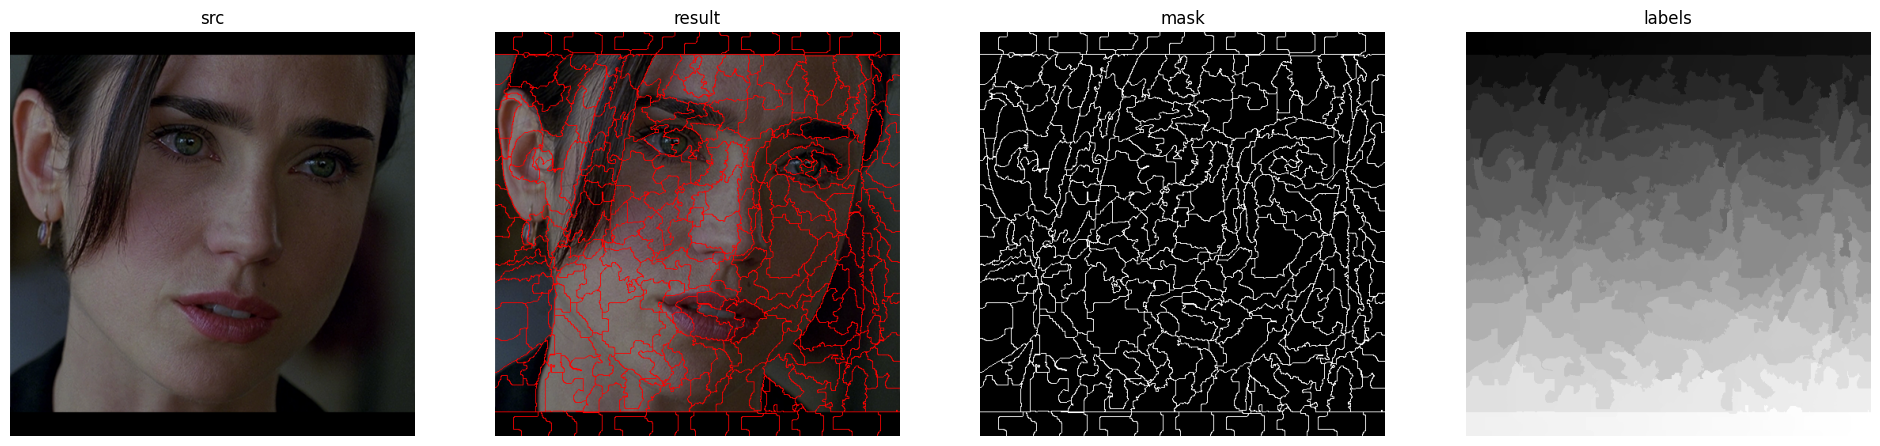

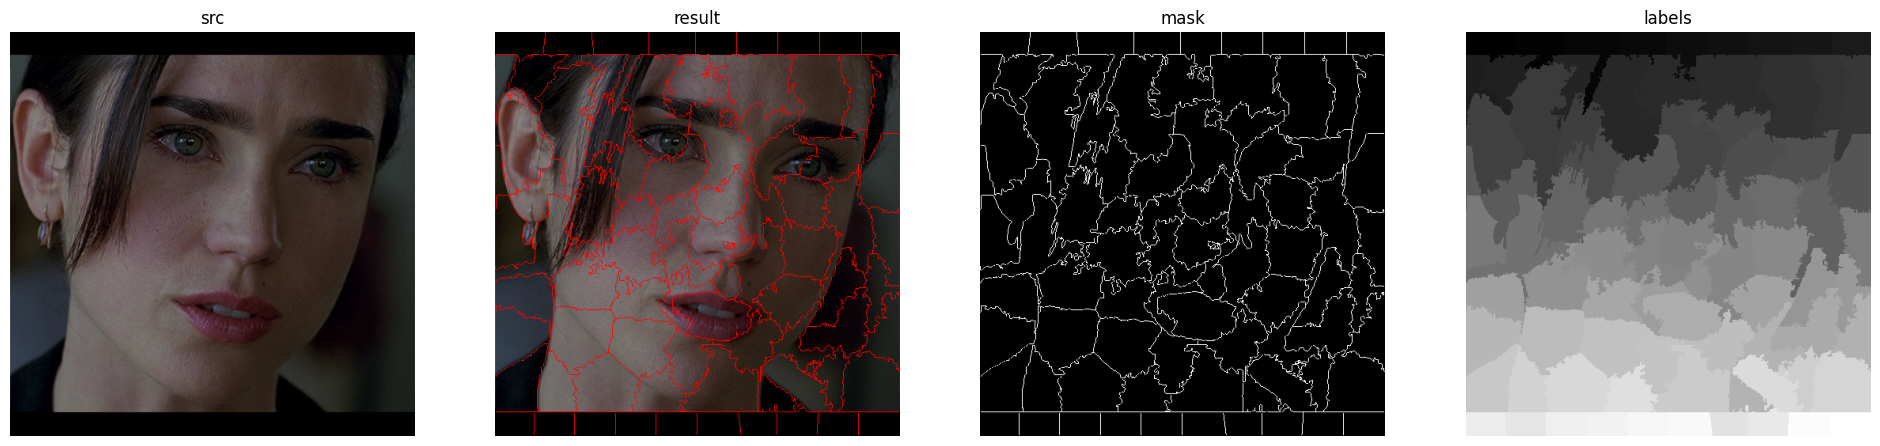

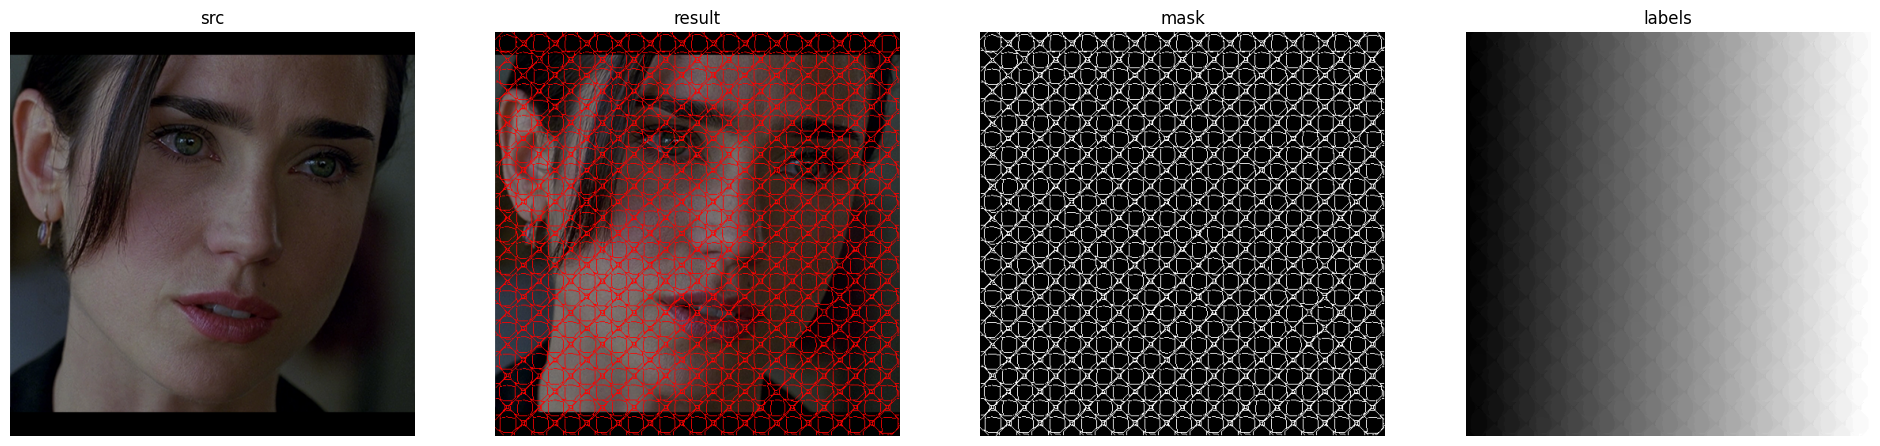

In [1]:
import cv2
import numpy as np
from utils import show_images

src = cv2.imread('image/edge/sources/06.png')

'''
class  	cv::ximgproc::SuperpixelLSC
class  	cv::ximgproc::SuperpixelSEEDS
class  	cv::ximgproc::SuperpixelSLIC
'''

rgb_src = cv2.imread('image/edge/sources/06.png')
hsv_src = cv2.cvtColor(rgb_src, cv2.COLOR_BGR2HSV)

# SEEDS 参数，请自行调整，原来 samples 文件对各个参数有 trackbar 调整方式，参数后面的注释就是其中的最大值
prior = 2               # 5
num_levels = 4          # 10
num_iterations = 4      # 1000
num_superpixels = 400   # 1000

num_histogram_bins = 5
double_step = False

seeds = cv2.ximgproc.createSuperpixelSEEDS(src.shape[1], src.shape[0], src.shape[2], num_superpixels, num_levels, prior, num_histogram_bins, double_step)
seeds.iterate(hsv_src, num_iterations)

# SLIC 参数
region_size = 50        # 200
ruler = 30              # 100
min_element_size = 50   # 100
num_iterations = 4      # 12
algorithm = cv2.ximgproc.SLIC   # SLIC, SLICO, MSLIC

slic = cv2.ximgproc.createSuperpixelSLIC(hsv_src, algorithm, region_size, ruler)
slic.iterate(num_iterations)
slic.enforceLabelConnectivity(min_element_size)

# LSC 参数
region_size = 10
ration = 0.075
num_iterations = 4

lsc = cv2.ximgproc.createSuperpixelLSC(hsv_src, region_size, ruler)
lsc.iterate(num_iterations)


for now in [seeds, slic, lsc]:
    labels = now.getLabels()
    mask = now.getLabelContourMask()
    nowimg = np.copy(src)
    nowimg[mask != 0] = [0, 0, 255]

    show_images([
        ('src', rgb_src),
        ('result', nowimg),
        ('mask', mask),
        ('labels', labels)
    ])